# BeautifulSoup 사용법

```
uv add beautifulsoup4
```

* [참고자료, TCP School](https://tcpschool.com/html/html_intro_elementStructure)

# 정적 크롤링 : BeautifulSoup

# 1. 미니 실습

In [386]:
html = """
<html>
  <body>
    <div id="main" class="content">
      <h1>첫 번째 헤더</h1>
      <h1 class="header">두 번째 헤더</h1>
      <p class="description">설명입니다.</p>
      <a href="https://example1.com" class="link">링크 1</a>
      <a href="https://example2.com" class="link">링크 2</a>
      <a href="https://example3.com" class="external">링크 3</a>
    </div>
    <div id="main2" class="content">
      <div class="items">
        <div>
            <img class="thumbnail" src="/data/picture1.png" />
            <div class="title">타이틀1</div>
            <div class="description">설명1</div>
        </div>
        <div>
            <img class="thumbnail" src="/data/picture2.png" />
            <div class="title">타이틀2</div>
            <div class="description">설명2</div>
        </div>
        <div>
            <img class="thumbnail" src="/data/picture3.png" />
            <div class="title test">타이틀3</div>
            <div class="description">설명3</div>
        </div>
      </div>
    </div>
  </body>
</html>
"""

## 1) HTML 파싱 준비

In [387]:
# HTML 파싱할 준비
from bs4 import BeautifulSoup
# 줄바꿈(\n) : ENTER
soup = BeautifulSoup(html, 'html.parser')
# print(soup)

## 2) 파싱

### `soup.find('태그명', class_ = "", id = "")`

In [388]:
soup.find("div", class_ = "title")

<div class="title">타이틀1</div>

In [389]:
outputs = soup.find_all("div", class_ = "title")
for out in outputs:
    print(out.text)

타이틀1
타이틀2
타이틀3


In [390]:
# (미션)
# "두 번째 헤더"를 출력해주세요
print(soup.find_all("h1")[1].text)

# "설명3"을 출력해주세요
print(soup.find_all("div", class_ = "description")[2].text)

# 태그 a를 모두 출력해주세요
for tag_a in soup.find_all("a"):
    print(f"{tag_a.text} : {tag_a["href"]}")

두 번째 헤더
설명3
링크 1 : https://example1.com
링크 2 : https://example2.com
링크 3 : https://example3.com


### 속성 추출

In [391]:
outputs = soup.find_all('a')
outputs

[<a class="link" href="https://example1.com">링크 1</a>,
 <a class="link" href="https://example2.com">링크 2</a>,
 <a class="external" href="https://example3.com">링크 3</a>]

In [392]:
output = outputs[0]
print(output)
print(output.attrs)
print(output.attrs["href"])
print(output.attrs.get("href"))

<a class="link" href="https://example1.com">링크 1</a>
{'href': 'https://example1.com', 'class': ['link']}
https://example1.com
https://example1.com


### `soup.select_one('경로')`

In [393]:
soup.select_one('div > a')

<a class="link" href="https://example1.com">링크 1</a>

In [394]:
soup.select_one("div > a:nth-child(5)")

<a class="link" href="https://example2.com">링크 2</a>

In [395]:
soup.select_one("div > a:nth-child(1)") # 해당 위치에 없을 경우 아무것도 찾아지지 않는다

### `soup.select("경로")`

- 클래스명: `태그명.클래스명`
- id명: `#id이름`

In [396]:
soup.select('div.items')

[<div class="items">
 <div>
 <img class="thumbnail" src="/data/picture1.png"/>
 <div class="title">타이틀1</div>
 <div class="description">설명1</div>
 </div>
 <div>
 <img class="thumbnail" src="/data/picture2.png"/>
 <div class="title">타이틀2</div>
 <div class="description">설명2</div>
 </div>
 <div>
 <img class="thumbnail" src="/data/picture3.png"/>
 <div class="title test">타이틀3</div>
 <div class="description">설명3</div>
 </div>
 </div>]

In [397]:
soup.select('#main2')

[<div class="content" id="main2">
 <div class="items">
 <div>
 <img class="thumbnail" src="/data/picture1.png"/>
 <div class="title">타이틀1</div>
 <div class="description">설명1</div>
 </div>
 <div>
 <img class="thumbnail" src="/data/picture2.png"/>
 <div class="title">타이틀2</div>
 <div class="description">설명2</div>
 </div>
 <div>
 <img class="thumbnail" src="/data/picture3.png"/>
 <div class="title test">타이틀3</div>
 <div class="description">설명3</div>
 </div>
 </div>
 </div>]

In [398]:
soup.select('div.items > div')

[<div>
 <img class="thumbnail" src="/data/picture1.png"/>
 <div class="title">타이틀1</div>
 <div class="description">설명1</div>
 </div>,
 <div>
 <img class="thumbnail" src="/data/picture2.png"/>
 <div class="title">타이틀2</div>
 <div class="description">설명2</div>
 </div>,
 <div>
 <img class="thumbnail" src="/data/picture3.png"/>
 <div class="title test">타이틀3</div>
 <div class="description">설명3</div>
 </div>]

In [399]:
soup.select("div.items > div:nth-child(3)")

[<div>
 <img class="thumbnail" src="/data/picture3.png"/>
 <div class="title test">타이틀3</div>
 <div class="description">설명3</div>
 </div>]

In [400]:
soup.select("img.thumbnail + div.title")

[<div class="title">타이틀1</div>,
 <div class="title">타이틀2</div>,
 <div class="title test">타이틀3</div>]

In [401]:
soup.select("img.thumbnail ~ div")

[<div class="title">타이틀1</div>,
 <div class="description">설명1</div>,
 <div class="title">타이틀2</div>,
 <div class="description">설명2</div>,
 <div class="title test">타이틀3</div>,
 <div class="description">설명3</div>]

## 3) 데이터 프레임 만들기

In [402]:
import pandas as pd

data = pd.DataFrame()

In [403]:
items_html = soup.find("div", class_ = "items")
titles = [ x.text for x in items_html.find_all("div", class_ = "title")]
descriptions = [ x.text for x in items_html.find_all("div", class_ = "description")]
urls = [ x.get("src") for x in items_html.find_all("img", class_ = "thumbnail")]

data["title"] = pd.Series(titles)
data["description"] = pd.Series(descriptions)
data["url"] = pd.Series(urls)

data

,title,description,url
0,타이틀1,설명1,/data/picture1.png
1,타이틀2,설명2,/data/picture2.png
2,타이틀3,설명3,/data/picture3.png


In [404]:
div_oupts = items_html.find_all("div", recursive=False)


item_list = []
for output in div_oupts:
    title_div = output.find("div", class_="title")
    title = title_div.text if title_div else "" # 예외처리
    
    description = output.find("div", class_ = "description").text
    url = output.find("img", class_ = "thumbnail").attrs.get("src")

    item_list.append(
        {
        "title" : title,
        "description" : description,
        "url" : url,
        }
    )

data = pd.DataFrame(item_list)
data

,title,description,url
0,타이틀1,설명1,/data/picture1.png
1,타이틀2,설명2,/data/picture2.png
2,타이틀3,설명3,/data/picture3.png


# 2. 교보문구 크롤링

## 1) HTML 요청하기

In [405]:
base_url = "https://search.kyobobook.co.kr"
keyword = "인공지능"
gbCode = "KBO"
target = "kyobo"
ra = "qntt"
page = 1

params = {
    "keyword": keyword,
    "gbCode": gbCode,
    "target": target,
    "ra": ra,
    "page": page,
}

url = f"{base_url}/search?keyword={keyword}&gbCode={gbCode}&target={target}&page={page}&ra={ra}"

In [406]:
import requests


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}
response = requests.get(base_url, params=params, headers=headers)
response.status_code

200

## 2) HTML 파싱 준비하기

#### header User-Agent 찾기

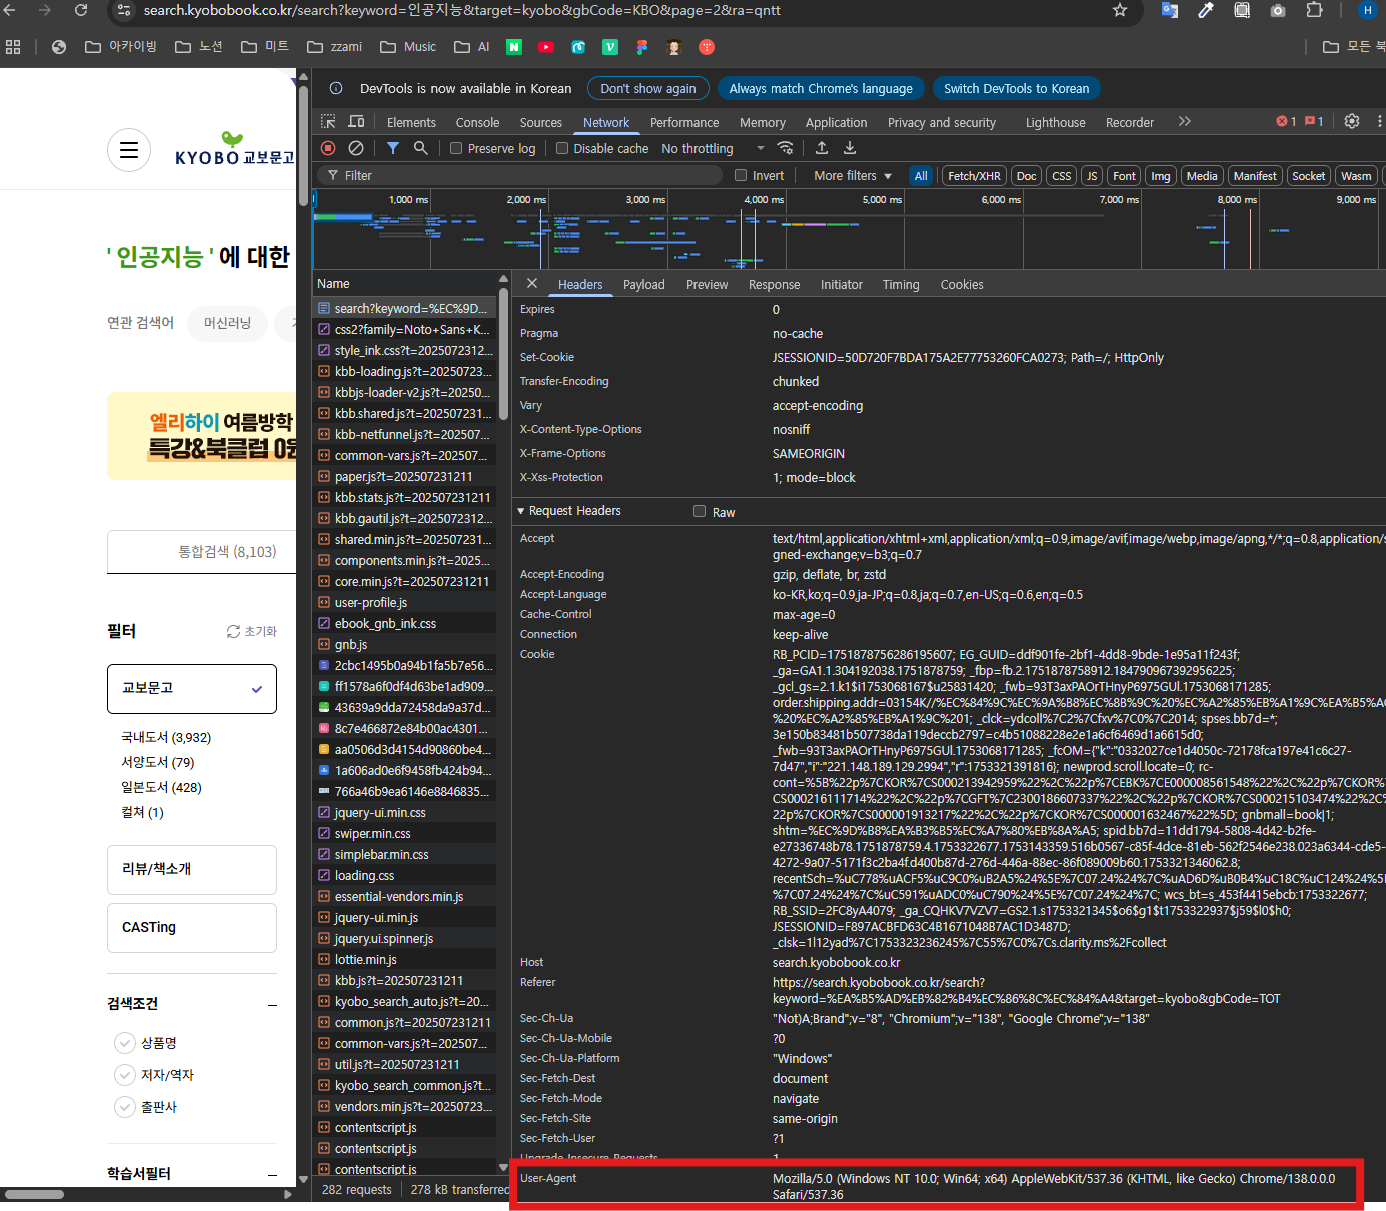

## 3) 파싱

In [407]:
data = BeautifulSoup(response.content, 'html.parser')
item_list = data.find_all("li", class_="prod_item")

In [408]:
# 이미지 정보
item_list[0].select_one("div.prod_thumb_box.size_lg > a > span > img")

#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_thumb_box.size_lg > a > span > img

<img class="prod_img_load" data-kbbfn="s3-image" data-kbbfn-adult="0" data-kbbfn-attr="src" data-kbbfn-bid="9791157847679" data-kbbfn-pid="S000214298857" data-kbbfn-size="200x0" data-kbbfn-title="박태웅의 AI 강의 2025" data-kbbfn-type="KOR">
</img>

In [409]:
item = item_list[0].select_one("div.prod_area.horizontal > div.prod_info_box")

In [410]:
# 카테고리 정보
category = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.auto_overflow_wrap.prod_name_group > div.auto_overflow_contents > div > a > span.prod_category").text.strip()

# 제목 정보
title = item.select("div.prod_area.horizontal > div.prod_info_box > div.auto_overflow_wrap.prod_name_group > div.auto_overflow_contents > div > a > span")[-1].text.strip()

print(category)
print(title)

#div.prod_area.horizontal > div.prod_info_box > div.auto_overflow_wrap.prod_name_group > div.auto_overflow_contents > div > a

[국내도서]
박태웅의 AI 강의 2025


In [411]:
# 소개 정보

description = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_desc_info").text.strip()

description
#shopData_list > ul > li:nth-child(2) > div.prod_area.horizontal > div.prod_info_box > div.prod_desc_info > span

''

In [412]:
# 저자 정보
autor_list = [data.text for data in item.select("div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.auto_overflow_wrap.prod_author_group > div.auto_overflow_contents > div.auto_overflow_inner > a")]

autor_type_list = [data.text for data in item.select("div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.auto_overflow_wrap.prod_author_group > div.auto_overflow_contents > div.auto_overflow_inner > span.type")]

#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.auto_overflow_wrap.prod_author_group

print(autor_list)
print(autor_type_list)

['박태웅']
['저자(글)']


In [420]:
# 날짜 정보 
date = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.prod_publish > span.date").text.strip()

date
#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.prod_publish > span.date

'2024년 09월 30일'

In [414]:
# 출판사 정보
publish = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.prod_publish > a").text.strip()

publish

#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_author_info > div.prod_publish > a

'한빛비즈'

In [417]:
import re
# 별점 정보
score = float(item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_bottom > a > span.review_klover_box > span.review_klover_text.font_size_xxs").text.strip())
score_count = int(re.sub("[^0-9]", "", item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_bottom > a > span.review_klover_box > span.review_desc").text.strip()))

print(score)
print(score_count)


#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_bottom > a > span.review_klover_box > span.review_klover_text.font_size_xxs
#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_bottom > a > span.review_klover_box > span.review_desc

9.62
188


In [ ]:
# 가격 정보
price_val = int(item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_price > span.price > span.val").text.strip().replace(",", ""))
price_unit = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.prod_price > span.price > span.unit").text.strip()

print(price_val)
print(price_unit)

#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.prod_price > span.price

16920
원


In [ ]:
# 태그
#shopData_list > ul > li:nth-child(1) > div.prod_area.horizontal > div.prod_info_box > div.tag_wrap.size_sm

tags = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.tag_wrap.size_sm")

tag_list = [data.text[1:] for data in tags.select("a")]
tag_list

['경제전망', '인공지능', '운영체제', '맥락인터페이스', '멀티모달', '휴머노이드', '옴니모달']

### + 태그 연관성 분석

In [ ]:
item_list = data.find_all("li", class_="prod_item")

tag_list = []

for item in item_list:
    tags = item.select_one("div.prod_area.horizontal > div.prod_info_box > div.tag_wrap.size_sm")
    sub_tag_list = [data.text[1:] for data in tags.select("a")]

    tag_list.append(sub_tag_list)
    
print(tag_list)

[['경제전망', '인공지능', '운영체제', '맥락인터페이스', '멀티모달', '휴머노이드', '옴니모달'], ['인문교양서', '호모사피엔스', '인공지능', '정보네크워크', '인류', '문명사', '현실주의'], ['GPT-4.1'], ['과학이야기', '질서', '문화', '예술', '미래', '교양과학', '인공지능'], ['경제전망', '인공지능활용', '미래예측', '교양과학', '데이터과학', 'IT기술', '기술발전', '네트워크'], [], [], ['컴퓨터공학', '개발방법론', 'ai코딩', '인공지능'], ['경제전망', 'AI', '인공지능', '샘올트먼', '데미스허사비스', '챗GPT', '제미나이', '오픈AI', '딥마인드', 'MS'], ['교양과학', '과학이야기'], ['어린이교양', '어린이과학', '어린이컴퓨터', '아동교양', 'AI', '과학기술', '미래', '4차산업혁명'], [], ['딥러닝', '자연어처리', 'BERT', '인공지능'], ['기계학습', '인공지능'], ['에듀테크', '융합수업', '인공지능'], [], ['경제전망', 'AI도입전략', '개발원칙', 'AI개발', 'AI기술', '기술트렌드', '인공지능'], ['문서자동화', 'ChatGPT', 'API', '랭체인', '컴퓨터공학', '인공지능', '리팩터링'], ['프롬프트', 'GPTs', 'GPT', '공학', '인공지능', '기초개념', '실습', '컴퓨터', '생성', 'AI'], []]


In [ ]:
import itertools

# 키:값 => 단어:빈도 수
from collections import Counter

counter = Counter(list(itertools.chain(*tag_list))).most_common(30)

<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:13: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_5404\3990061164.py:13: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windodws\Fonts\malgunbd.ttf",
c:\Potenup\data_analysis\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


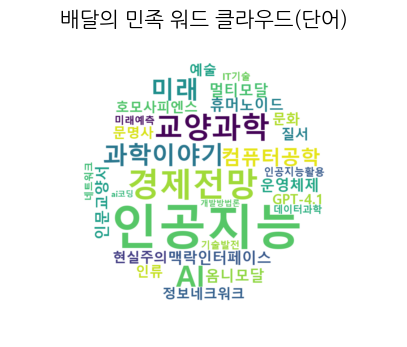

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgunbd.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
plt.show()

In [ ]:
print(list(counter))

[('인공지능', 11), ('경제전망', 4), ('교양과학', 3), ('AI', 3), ('과학이야기', 2), ('미래', 2), ('컴퓨터공학', 2), ('운영체제', 1), ('맥락인터페이스', 1), ('멀티모달', 1), ('휴머노이드', 1), ('옴니모달', 1), ('인문교양서', 1), ('호모사피엔스', 1), ('정보네크워크', 1), ('인류', 1), ('문명사', 1), ('현실주의', 1), ('GPT-4.1', 1), ('질서', 1), ('문화', 1), ('예술', 1), ('인공지능활용', 1), ('미래예측', 1), ('데이터과학', 1), ('IT기술', 1), ('기술발전', 1), ('네트워크', 1), ('개발방법론', 1), ('ai코딩', 1)]


In [ ]:
# 빈도 수 높은 태그만 남기기
new_tag_list = []
counter_list = [data[0] for data in list(counter)]
for prev_tags in tag_list:
    sub_tags = []
    for tag in prev_tags:
        if tag in counter_list:
            sub_tags.append(tag)
    new_tag_list.append(sub_tags)

print(counter_list)
print(new_tag_list)

['인공지능', '경제전망', '교양과학', 'AI', '과학이야기', '미래', '컴퓨터공학', '운영체제', '맥락인터페이스', '멀티모달', '휴머노이드', '옴니모달', '인문교양서', '호모사피엔스', '정보네크워크', '인류', '문명사', '현실주의', 'GPT-4.1', '질서', '문화', '예술', '인공지능활용', '미래예측', '데이터과학', 'IT기술', '기술발전', '네트워크', '개발방법론', 'ai코딩']
[['경제전망', '인공지능', '운영체제', '맥락인터페이스', '멀티모달', '휴머노이드', '옴니모달'], ['인문교양서', '호모사피엔스', '인공지능', '정보네크워크', '인류', '문명사', '현실주의'], ['GPT-4.1'], ['과학이야기', '질서', '문화', '예술', '미래', '교양과학', '인공지능'], ['경제전망', '인공지능활용', '미래예측', '교양과학', '데이터과학', 'IT기술', '기술발전', '네트워크'], [], [], ['컴퓨터공학', '개발방법론', 'ai코딩', '인공지능'], ['경제전망', 'AI', '인공지능'], ['교양과학', '과학이야기'], ['AI', '미래'], [], ['인공지능'], ['인공지능'], ['인공지능'], [], ['경제전망', '인공지능'], ['컴퓨터공학', '인공지능'], ['인공지능', 'AI'], []]


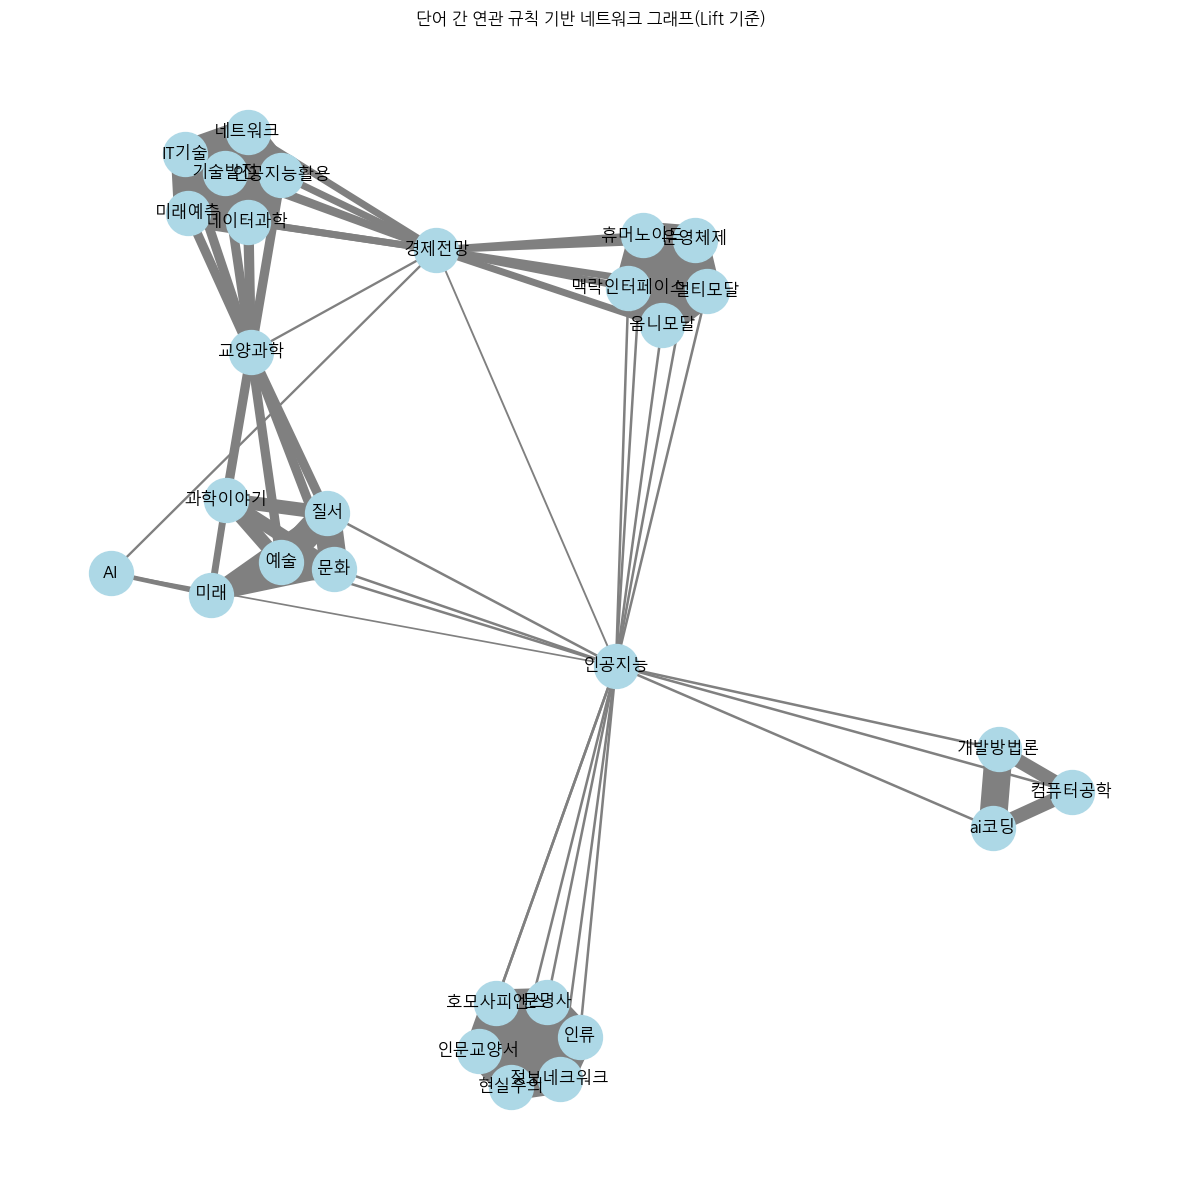

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(new_tag_list).transform(new_tag_list)


df = pd.DataFrame(te_arr, columns=te.columns_)
df.sum(axis=0)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
frequent_itemsets

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x)))) # 질문: ,로 join 을 하는 이유는?
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

# 연관성 분석 테이블
# pivot_data = rules.pivot_table(
#     index="antecedents_str",
#     columns="consequents_str",
#     values="lift",
#     fill_value=0
# )
# plt.figure(figsize=(10,10))
# sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
# plt.title("연관성 분석 시각화(Lift 기준)")
# plt.xlabel("Consequents")
# plt.ylabel("Antecedents")
# plt.show()

# 네트워크 분석 시각화
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["lift"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=1)

# 4. 가중치 추출
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

## 4) 